In [17]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt

from data.hlf_dataset_utils import load_data, feature_names, load_data2

In [19]:
hdf5_file = h5py.File('/home/oliverkn/pro/real_data_test/test.hdf5', "r")
data = hdf5_file['data'].value
hdf5_file.close()
print(data.shape)

names = pickle.load(open('/home/oliverkn/pro/real_data_test/test.pkl', "rb"))
print(names)

(15742, 23)
['HT', 'mass_jet', 'n_jet', 'n_bjet', 'lep_pt', 'lep_eta', 'lep_charge', 'lep_iso_ch', 'lep_iso_neu', 'lep_iso_gamma', 'MET', 'METo', 'METp', 'MT', 'n_mu', 'pt_mu', 'mass_mu', 'n_ele', 'pt_ele', 'mass_ele', 'n_neu', 'n_ch', 'n_photon']


In [20]:
x, _ = load_data2('/home/oliverkn/pro/data/hlf_set', set='valid', type='custom', sm_list=['sm_mix'])

feature_names = ['HT', 'METp', 'METo', 'MT', 'nJets',
                 'bJets', 'allJetMass', 'LepPt', 'LepEta',
                 'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu', 'LepCharge',
                 'LepIsEle', 'nMu', 'allMuMass', 'allMuPt', 'nEle',
                 'allEleMass', 'allElePt', 'nChHad', 'nNeuHad', 'nPhoton']

data_sim = np.zeros(shape=(x.shape[0],data.shape[1]))
data_sim[:,0] = x[:,0]
data_sim[:,1] = x[:,6]
data_sim[:,2] = x[:,4]
data_sim[:,3] = x[:,5]
data_sim[:,4] = x[:,7]
data_sim[:,5] = x[:,8]
data_sim[:,6] = x[:,12]
data_sim[:,7] = x[:,9]# lep_iso_ch
data_sim[:,8] = x[:,11]
data_sim[:,9] = x[:,10]
data_sim[:,10] = x[:,3]#MET
data_sim[:,11] = x[:,2]
data_sim[:,12] = x[:,1]
data_sim[:,13] = x[:,3]#MT
data_sim[:,14] = x[:,14]#n_mu
data_sim[:,15] = x[:,16]
data_sim[:,16] = x[:,15]
data_sim[:,17] = x[:,17]#n_e
data_sim[:,18] = x[:,19]
data_sim[:,19] = x[:,18]
data_sim[:,20] = x[:,21]#n_neu
data_sim[:,21] = x[:,20]#n_had
data_sim[:,22] = x[:,22]#n_pho

/home/oliverkn/pro/pycharm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


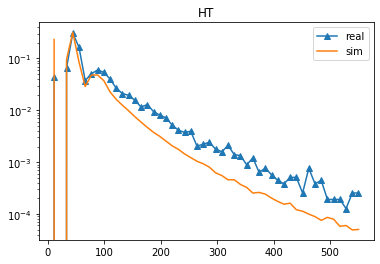

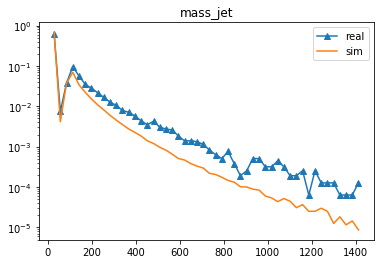

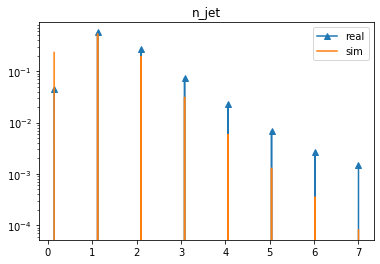

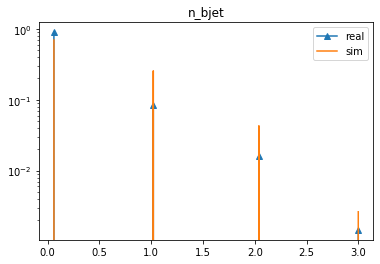

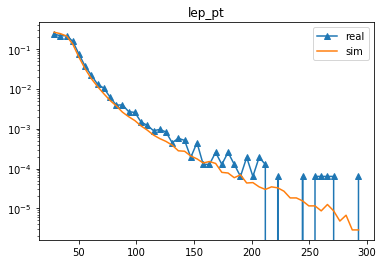

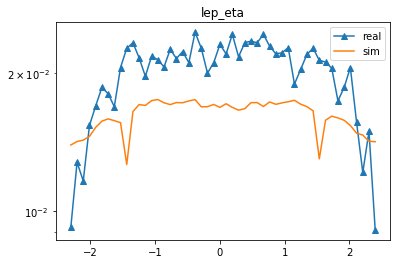

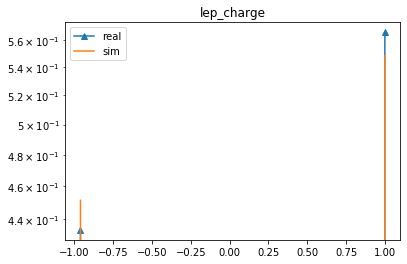

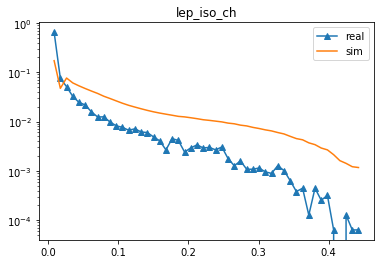

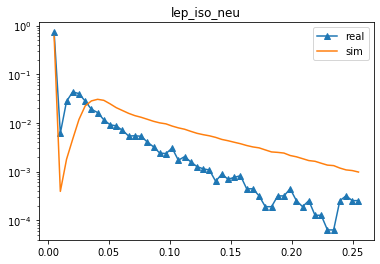

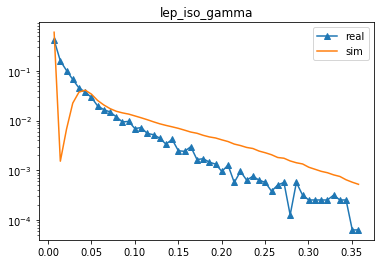

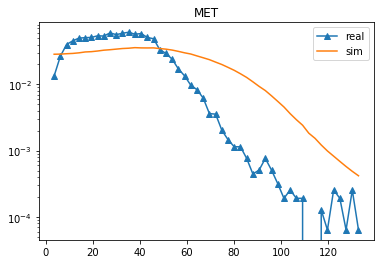

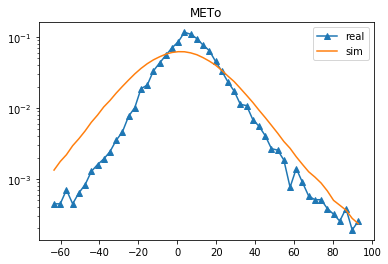

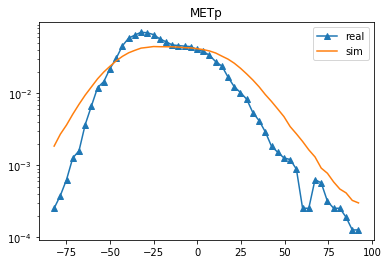

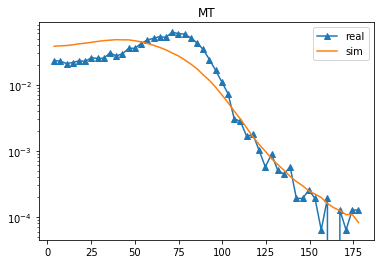

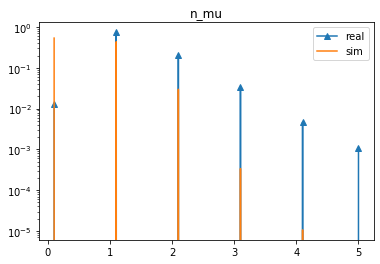

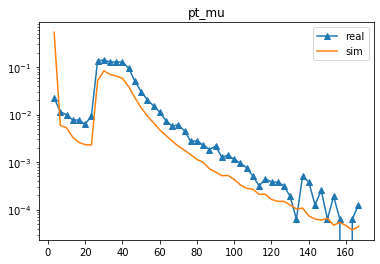

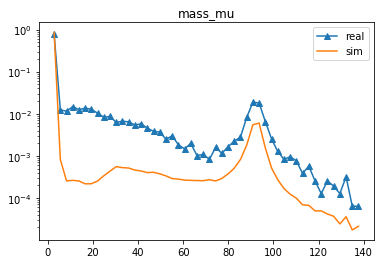

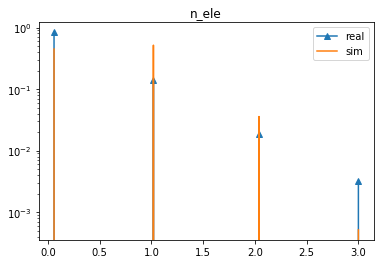

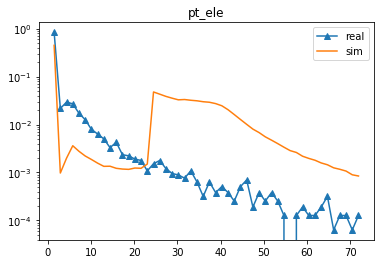

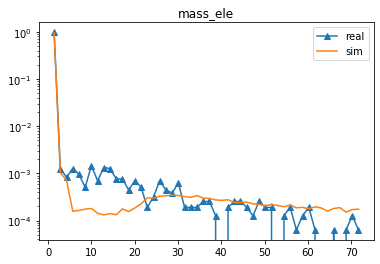

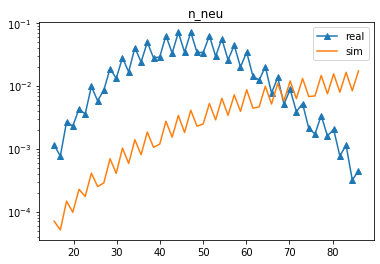

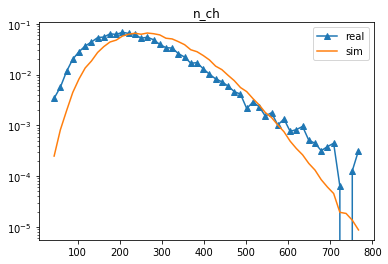

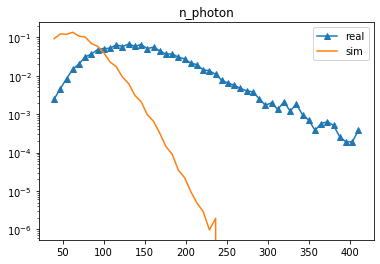

In [28]:
bins = 50
for i, name in enumerate(names):
    plt.figure()
    range = (np.quantile(data[:,i],0.001),np.quantile(data[:,i],0.999))
    
    pdf, bin_edges = np.histogram(data[:,i], bins=bins, range=range)
    pdf_sim, bin_edges_sim = np.histogram(data_sim[:,i], bins=bins, range=range)
    
    pdf = pdf/data.shape[0]
    pdf_sim = pdf_sim/data_sim.shape[0]
    
    plt.plot(bin_edges[1:], pdf, '^-',label='real')
    plt.plot(bin_edges_sim[1:], pdf_sim, label='sim')
    plt.title(name)
    plt.yscale('log', nonposy='clip')
    plt.legend()
plt.show()